In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

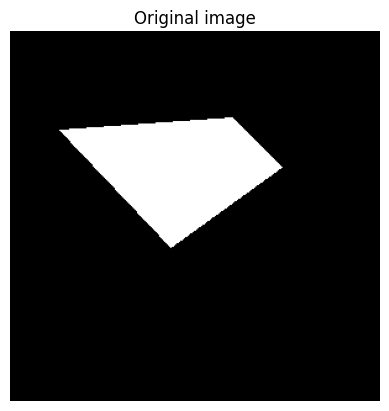

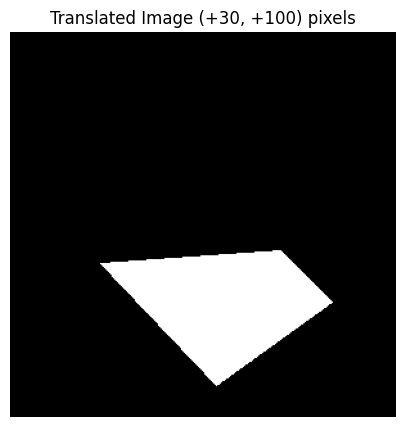

In [2]:
######### Section 1 = Quadrilateral creation #######################

# Create a blank 300x300 pixel black image
width, height = 300, 300
background_color = (0, 0, 0)  # Black
org_image = np.zeros((height, width, 3), dtype=np.uint8)
org_image[:, :] = background_color

# Define the coordinates of the quadrilateral's four corners
# quadrilateral = np.array([(40, 80), (180, 80), (220, 110), (180, 175)], np.int32)
quadrilateral = np.array([(40, 80), (180, 70), (220, 110), (130, 175)], np.int32)
quadrilateral = quadrilateral.reshape((-1, 1, 2))

# Fill the quadrilateral with white color
white_color = (255, 255, 255)
cv2.fillPoly(org_image, [quadrilateral], white_color)

# Save the original image with the centered white quadrilateral
cv2.imwrite("original_image.png", org_image)

# Display the original and translated images with labels
plt.figure()
plt.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis labels and ticks
plt.title('Original image')
plt.show()

# Perform translation by (30, 100) pixels
translation_matrix = np.float32([[1, 0, 30], [0, 1, 100]])
translated_image = cv2.warpAffine(org_image, translation_matrix, (width, height))

# Save the translated image
cv2.imwrite("translated_image.png", translated_image)

# Display the original and translated images with labels
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Translated Image (+30, +100) pixels')

plt.show()





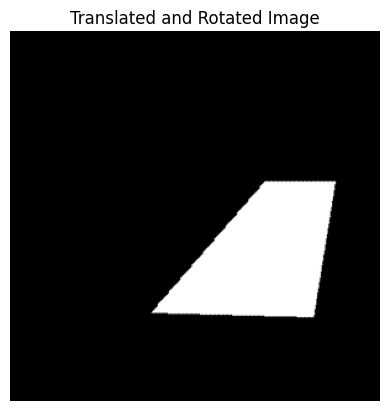

In [3]:

#Quadialteral Rotation
# Load the original image
translated_image = cv2.imread("translated_image.png")

# Find the center of the image
height, width, _ = translated_image.shape
center_x, center_y = width // 2, height // 2

# Define the rotation angle (45 degrees)
angle = 45

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(translated_image, rotation_matrix, (width, height))

# Save the rotated image
cv2.imwrite("rotated_image.png", rotated_image)

# display image
plt.figure()
plt.imshow(rotated_image)
plt.axis('off')  # Turn off the axis labels and ticks
plt.title('Translated and Rotated Image')
plt.show()

####################################################################################


(array([ 69,  70,  71,  71,  72,  78,  79,  79,  79,  79,  79,  80,  80,
        80,  80,  80,  80,  81,  81,  81,  81,  81,  81,  81,  81,  82,
        82,  82, 109, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110,
       110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 172, 172, 173,
       173, 174, 174, 174, 175, 175, 175, 176, 176, 176, 177, 177, 177,
       178, 178, 178], dtype=int64), array([180, 180, 179, 180, 179,  40,  37,  38,  39,  40,  41,  37,  38,
        39,  40,  41,  42,  37,  38,  39,  40,  41,  42,  43,  44,  44,
        45,  46, 217, 218, 219, 220, 221, 222, 223, 216, 217, 218, 219,
       220, 221, 222, 223, 218, 219, 220, 221, 222, 223, 130, 131, 130,
       131, 129, 130, 131, 129, 130, 131, 129, 130, 131, 129, 130, 131,
       129, 130, 131], dtype=int64))


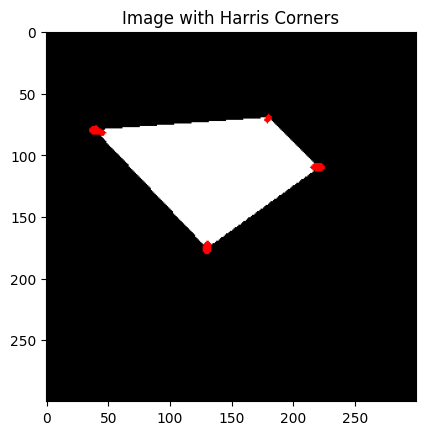

(array([118, 119, 120, 120, 121, 121, 121, 122, 122, 122, 122, 122, 122,
       122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 124, 124, 124,
       125, 132, 133, 134, 137, 138, 139, 142, 150, 151, 163, 168, 182,
       184, 195, 199, 211, 212, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 226, 226, 226, 226, 226, 226,
       226, 226, 226, 226, 227, 227, 227, 227, 227, 227, 227, 227, 227,
       227, 227, 227, 227, 227, 227, 227, 227, 227, 228, 228, 228, 228,
       228, 228, 228, 228, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 230, 230, 230, 231, 231, 231, 232, 232, 232, 232, 232, 232,
       232, 232, 232, 232, 233, 234, 234, 234, 234, 234, 234, 234, 234],
      dtype=int64), array([263, 263, 263, 264, 262, 263, 264, 206, 207, 262, 263, 264, 265,
       266, 267, 207, 261, 262, 263, 264, 265, 266, 267, 207, 260, 261,
       259, 266, 266, 266, 257, 257, 257, 256, 263, 263, 261, 260, 250,
       250, 256, 247, 245, 253, 121, 122, 

<function matplotlib.pyplot.show(close=None, block=None)>

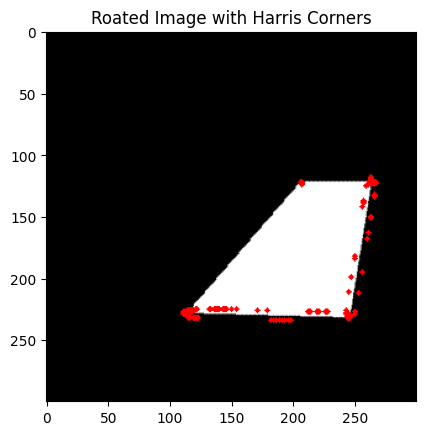

In [4]:
################## Section 2: Feature Detector and descriptor ##################

def harris_corner_detector(image, threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Calculate gradients using Sobel operators
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Calculate Harris Corner Response
    alpha = 0.04
    Ixx = dx**2
    Iyy = dy**2
    Ixy = dx * dy

    height, width = image.shape[:2]
    R = np.zeros((height, width))

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            Sxx = np.sum(Ixx[y-1:y+2, x-1:x+2])
            Syy = np.sum(Iyy[y-1:y+2, x-1:x+2])
            Sxy = np.sum(Ixy[y-1:y+2, x-1:x+2])

            # Harris Corner Response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            R[y, x] = det - alpha * (trace**2)

    # Threshold for corner detection
    corners = np.where(R > threshold)

    return corners


orig_corners = harris_corner_detector(org_image, 0.5)
print(orig_corners)

# Display the original image with marked corners
image_with_corners = org_image.copy()
corner_size = 2  # Define the size of the corner marks

for y, x in zip(orig_corners[0], orig_corners[1]):
    cv2.circle(image_with_corners, (x, y), corner_size, (0, 0, 255), -1)  # Mark corners in red

plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Image with Harris Corners")
plt.show()

rotated_corners = harris_corner_detector(rotated_image, 0.5)
print(rotated_corners)

rotated_image_with_corners = rotated_image.copy()

for y,x in zip(rotated_corners[0], rotated_corners[1]):
    cv2.circle(rotated_image_with_corners, (x,y), corner_size, (0,0,255), -1)

plt.imshow(cv2.cvtColor(rotated_image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Roated Image with Harris Corners")
plt.show


[[ 72  82 111 178]
 [179  46 223 131]]


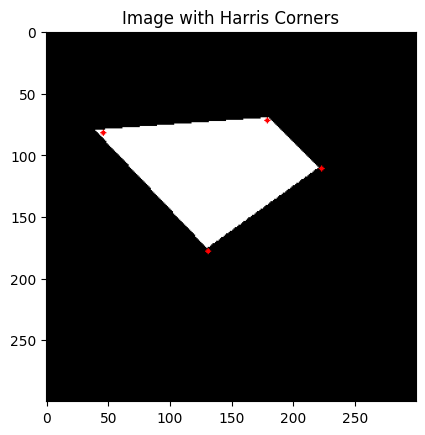

[[124 142 151 168 184 199 212 225 227 232 233 234]
 [207 256 263 260 250 247 253 154 228 123 245 198]]


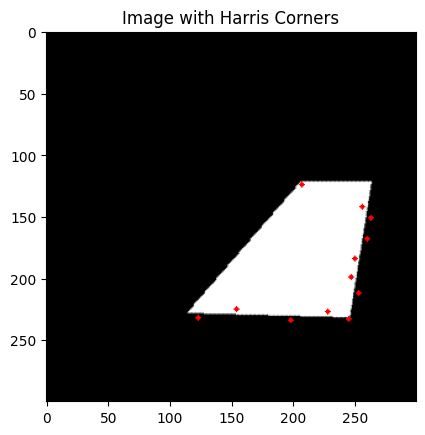

In [5]:

#Filtering the corners to get a better result
def filter_close_points(input_coords, min_dist=10):
    filtered_coords = []

    for i in range(len(input_coords[0])):
        x1, y1 = input_coords[1][i], input_coords[0][i]

        keep_point = True

        for j in range(i + 1, len(input_coords[0])):
            x2, y2 = input_coords[1][j], input_coords[0][j]

            distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

            if distance < min_dist:
                keep_point = False
                break

        if keep_point:
            filtered_coords.append((y1, x1))

    filtered_coords = np.array(filtered_coords).T

    return filtered_coords

#checking for the corner detection
org_image = cv2.imread("original_image.png")

src_corners = harris_corner_detector(org_image, 0.01)
src_corners = filter_close_points(src_corners)
print(src_corners)

# Display the original image with marked corners
image_with_corners = org_image.copy()
corner_size = 2  # Define the size of the corner marks

for y, x in zip(src_corners[0], src_corners[1]):
    cv2.circle(image_with_corners, (x, y), corner_size, (0, 0, 255), -1)  # Mark corners in red

plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Image with Harris Corners")
plt.show()


##################

#checking for the corner detection
org_image = cv2.imread("original_image.png")

src_corners = harris_corner_detector(rotated_image, 0.05)
src_corners = filter_close_points(src_corners)
print(src_corners)

# Display the original image with marked corners
image_with_corners_2 = rotated_image.copy()
corner_size = 2  # Define the size of the corner marks

for y, x in zip(src_corners[0], src_corners[1]):
    cv2.circle(image_with_corners_2, (x, y), corner_size, (0, 0, 255), -1)  # Mark corners in red

plt.imshow(cv2.cvtColor(image_with_corners_2, cv2.COLOR_BGR2RGB))
plt.title("Image with Harris Corners")
plt.show()


####################################################################################

https://www.kaggle.com/code/dasmehdixtr/harris-corner-detector-example-from-scratch/notebook

In [6]:
################## Section 3: Linear Least Squares Optimization ##################

# Perform Harris Corner Detection to get corner points in the original image
threshold = 0.5  # Adjust the threshold as needed
# Detect corners in the original and rotated images
src_corners = harris_corner_detector(org_image, threshold)
src_corners = filter_close_points(src_corners)
dst_corners = harris_corner_detector(rotated_image, threshold)
dst_corners = filter_close_points(dst_corners)

# src_corners and dst_corners should be lists of (x, y) coordinates

# Now you can use these coordinates to establish point correspondences for the optimization
src_points = src_corners  # List of source points
dst_points = dst_corners  # List of destination points

# You can then proceed with the linear least squares optimization using src_points and dst_points

# src_points and dst_points are your corresponding point sets
A = np.zeros((2 * len(src_points), 3))
b = np.zeros((2 * len(src_points), 1))

for i in range(len(src_points)):

    scr_x = src_points[i][0]
    scr_y = src_points[i][1]
    dst_x = dst_points[i][0]
    dst_y = dst_points[i][1]
    A[2 * i] = [scr_x, -scr_y, 1]
    A[2 * i + 1] = [scr_y, scr_x, 1]
    b[2 * i] = dst_x
    b[2 * i + 1] = dst_y

# Solve for the transformation parameters using least squares
params, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

# Extract the estimated parameters
theta, tx, ty = params[:, 0]
theta = np.rad2deg(theta)
tx = tx*100
# Display the estimated parameters
print("Estimated parameters:")
print("Estimated angle of rotation (in Degrees), theta: {:.3f}".format(theta))
print("x-axis translation, tx: {:.3f}".format(tx))
print("y-axis translation, ty: {:.3f}".format(ty))

####################################################################################

Estimated parameters:
Estimated angle of rotation (in Degrees), theta: 34.421
x-axis translation, tx: 49.530
y-axis translation, ty: 110.097


<span >
    It can be observed here that The estimations are close to the original ones. <br>
    x-axis translation was 30, estimated is 49.5 <br>
    y-axis translation was 100, estimated is 110 <br>
    totation was 45 degress and the estimation is 49.53 degrees. <br>
